Using the cleaned 2018 and 2021 data, we will analyze the medical confidence in the United States pre and post pandemic.

In [1]:
!git clone https://github.com/jacqueline-chao/project-1.git

Cloning into 'project-1'...
remote: Enumerating objects: 50, done.
remote: Counting objects: 100% (50/50), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 50 (delta 18), reused 33 (delta 7), pack-reused 0
Receiving objects: 100% (50/50), 834.14 KiB | 11.58 MiB/s, done.
Resolving deltas: 100% (18/18), done.


##### Preliminary Data Analysis Preparation

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("../data/2018_v_2021_data.csv")
print("Shape of data:", df.shape, "\n")
print("Number of 2018 Entries:\n", df[df['year']==2018].count(), "\n")
print("Number of 2021 Entries:\n", df[df['year']==2021].count(), "\n")

Shape of data: (4272, 9) 

Number of 2018 Entries:
 conmedic    1412
partyid     2104
region      2136
id          2136
age         2132
sex         2136
race        2136
degree      2136
year        2136
dtype: int64 

Number of 2021 Entries:
 conmedic    1404
partyid     2115
region      2136
id          2136
age         1955
sex         2085
race        2113
degree      2122
year        2136
dtype: int64 



In [11]:
df.head(10)

,conmedic,partyid,region,id,age,sex,race,degree,year
0,NaN,5.0,1,1,43.0,1.0,1.0,2.0,2018
1,1.0,2.0,1,2,74.0,2.0,1.0,1.0,2018
2,1.0,4.0,1,3,42.0,1.0,1.0,3.0,2018
3,3.0,2.0,1,4,63.0,2.0,1.0,3.0,2018
4,NaN,2.0,1,6,67.0,2.0,1.0,3.0,2018
5,1.0,0.0,2,7,59.0,2.0,2.0,1.0,2018
6,2.0,5.0,2,8,43.0,1.0,1.0,1.0,2018
7,2.0,3.0,2,9,62.0,2.0,1.0,0.0,2018
8,2.0,1.0,1,10,55.0,1.0,1.0,1.0,2018
9,2.0,1.0,1,12,34.0,2.0,3.0,1.0,2018


Since we are looking at "conmedic", let us filter our dataset to only keep the data entries with conmedic values before conducting further data analysis/visualization.

In [4]:
df = df[df['conmedic'].notnull()]
print("Shape of data:", df.shape, "\n")
print("Number of 2018 Entries:\n", df[df['year']==2018].count(), "\n")
print("Number of 2021 Entries:\n", df[df['year']==2021].count(), "\n")

Shape of data: (2816, 9) 

Number of 2018 Entries:
 conmedic    1412
partyid     1394
region      1412
id          1412
age         1409
sex         1412
race        1412
degree      1412
year        1412
dtype: int64 

Number of 2021 Entries:
 conmedic    1404
partyid     1391
region      1404
id          1404
age         1280
sex         1369
race        1392
degree      1395
year        1404
dtype: int64 



We can verify that there are now zero null values in the "conmedic" column.

In [5]:
print(df['conmedic'].isnull().sum())

0


##### Quantiable Data Analysis

Here, let us evaluate the data with statistical measurements for the different attributes that we examine.

In [ ]:
df.describe()

,conmedic,partyid,region,id,age,sex,race,degree,year
count,2816.000000,2785.000000,2816.000000,2816.000000,2689.000000,2781.000000,2804.000000,2807.000000,2816.000000
mean,1.744673,2.872172,5.010298,1166.461648,50.224247,1.553398,1.349144,1.884931,2019.495739
std,0.653293,2.096153,2.363029,675.775765,17.516635,0.497230,0.660054,1.263816,1.500260
min,1.000000,0.000000,1.000000,1.000000,18.000000,1.000000,1.000000,0.000000,2018.000000
25%,1.000000,1.000000,3.000000,584.000000,35.000000,1.000000,1.000000,1.000000,2018.000000
50%,2.000000,3.000000,5.000000,1159.500000,50.000000,2.000000,1.000000,1.000000,2018.000000
75%,2.000000,5.000000,7.000000,1744.250000,64.000000,2.000000,1.000000,3.000000,2021.000000
max,3.000000,7.000000,9.000000,2348.000000,89.000000,2.000000,3.000000,4.000000,2021.000000


In [ ]:
df_year_grouping = df.groupby('year').describe()
pd.set_option('display.max_rows', 100)
df_year_grouping[['conmedic', 'partyid', 'age']].transpose()

year                   2018         2021
conmedic count  1412.000000  1404.000000
         mean      1.781161     1.707977
         std       0.664680     0.639778
         min       1.000000     1.000000
         25%       1.000000     1.000000
         50%       2.000000     2.000000
         75%       2.000000     2.000000
         max       3.000000     3.000000
partyid  count  1394.000000  1391.000000
         mean      2.898135     2.846154
         std       2.086695     2.106017
         min       0.000000     0.000000
         25%       1.000000     1.000000
         50%       3.000000     3.000000
         75%       5.000000     5.000000
         max       7.000000     7.000000
age      count  1409.000000  1280.000000
         mean     48.507452    52.114063
         std      17.928087    16.858129
         min      18.000000    18.000000
         25%      34.000000    38.000000
         50%      48.000000    53.000000
         75%      63.000000    65.000000
         max      89.000000    89.000000

Looking at the measures of central tendency for "conmedic" in the entire dataset, it seems that most people selected 1 or 2, which indicates that they have a "great deal" or "only some" confidence in the people running medical institutions in the U.S. Interestingly, the mean and percentile values for "conmedic" across the two years appear to be very similar. We will have to further investigate to see if there are any discrepancies in how the data are clustered.

"Partyid" also stayed fairly constant across the two years, which could indicate that few people changes party associations between 2018 and 2021 (or, if they did, then they reverted to their original party).

The age data reveal that the sample population has a relatively high representation of older people. Age could perhaps affect how quickly people's trust in institutions change, so this may be an interesting factor to examine.

We show here how the number of subjects in each subgroup collected has changed pre and post pandemic.

In [ ]:
var = 'partyid'
df_year_grouping = df[['year', var, 'conmedic']].groupby([var, 'year']).count()
df_year_grouping

conmedic
partyid year          
0.0     2018       228
        2021       266
1.0     2018       206
        2021       175
2.0     2018       194
        2021       169
3.0     2018       240
        2021       297
4.0     2018       161
        2021       125
5.0     2018       160
        2021       136
6.0     2018       153
        2021       186
7.0     2018        52
        2021        37

In [ ]:
var = 'sex'
df_year_grouping = df[['year', var, 'conmedic']].groupby([var, 'year']).count()
df_year_grouping

conmedic
sex year          
1.0 2018       642
    2021       600
2.0 2018       770
    2021       769

In [ ]:
var = 'race'
df_year_grouping = df[['year', var, 'conmedic']].groupby([var, 'year']).count()
df_year_grouping

conmedic
race year          
1.0  2018      1012
     2021      1105
2.0  2018       236
     2021       159
3.0  2018       164
     2021       128

In [ ]:
var = 'region'
df_year_grouping = df[['year', var, 'conmedic']].groupby([var, 'year']).count()
df_year_grouping

conmedic
region year          
1      2018        68
       2021        90
2      2018       147
       2021       158
3      2018       228
       2021       263
4      2018        73
       2021       105
5      2018       305
       2021       321
6      2018       104
       2021        94
7      2018       174
       2021       156
8      2018       109
       2021       133
9      2018       204
       2021        84

In [ ]:
var = 'degree'
df_year_grouping = df[['year', var, 'conmedic']].groupby([var, 'year']).count()
df_year_grouping

conmedic
degree year          
0.0    2018       157
       2021        82
1.0    2018       699
       2021       586
2.0    2018       128
       2021       134
3.0    2018       273
       2021       329
4.0    2018       155
       2021       264

Interestingly, most groups of people with the same degree had a positive population change, but the group with a degree code of 0.0 (the group of people with less than a high school degree) decreased by about half. This is perhaps due to death; perhaps it is due to very old people passing away -- who, in their day, were less likely to require or even be able to pursue higher education. Alternatively, it might indicate that people with this level of education were more adversely affected by the COVID pandemic.

Before moving on to data visualization, let us examine if there seems to be a correlation between "year" and "conmedic".

In [6]:
vars = ['year', 'conmedic']
cor = df.loc[:,vars].corr()
print(cor)

              year  conmedic
year      1.000000 -0.056022
conmedic -0.056022  1.000000


The correlation value is close to 0, indicating that there is not a strong correlation. It is also slightly negative, indicating that trust slightly increased (since a lower "conmedic" score indicates greater trust) between 2018 and 2021.

##### Data Visualization

Let us examine how the confidence in medicine has changed across our observed demographic groups pre and post pandemic.

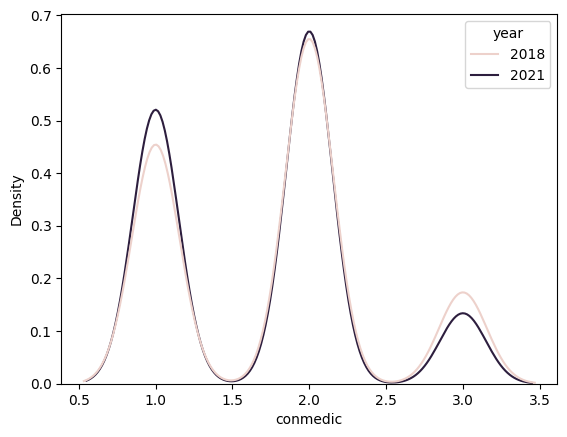

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plot = sns.kdeplot(data=df, x='conmedic', hue='year', hue_order = [2018, 2021])

When looking at the entire population, the kernel density plots between the two years look fairly similar. In fact, more people distrusted the medical institution in 2018 than in 2021, and more people trusted the medical institution in 2021 than in 2018. This would seem to indicate that something -- perhaps the response to the COVID-19 pandemic -- increased people's trust in medical institutions between the years of 2018 and 2021. These results -- both how similar the distribution of "conmedic" was between the two years and the slight increase in trust -- match the correlation values we saw earlier.

Perhaps different subgroups of the population had different changes in trust in the medical institution.

First, we will visualize kernel density of conmedic w.r.t year and party id

In [9]:
print(df.partyid.dropna().unique())

[2. 4. 0. 5. 3. 1. 6. 7.]


In [10]:
# these values are from the codebook
party_names = ["STRONG DEMOCRAT",
               "NOT VERY STRONG DEMOCRAT",
               "INDEPENDENT, CLOSE TO DEMOCRAT",
               "INDEPENDENT (NEITHER, NO RESPONSE)",
               "INDEPENDENT, CLOSE TO REPUBLICAN",
               "NOT VERY STRONG REPUBLICAN",
               "STRONG REPUBLICAN",
               "OTHER PARTY"]

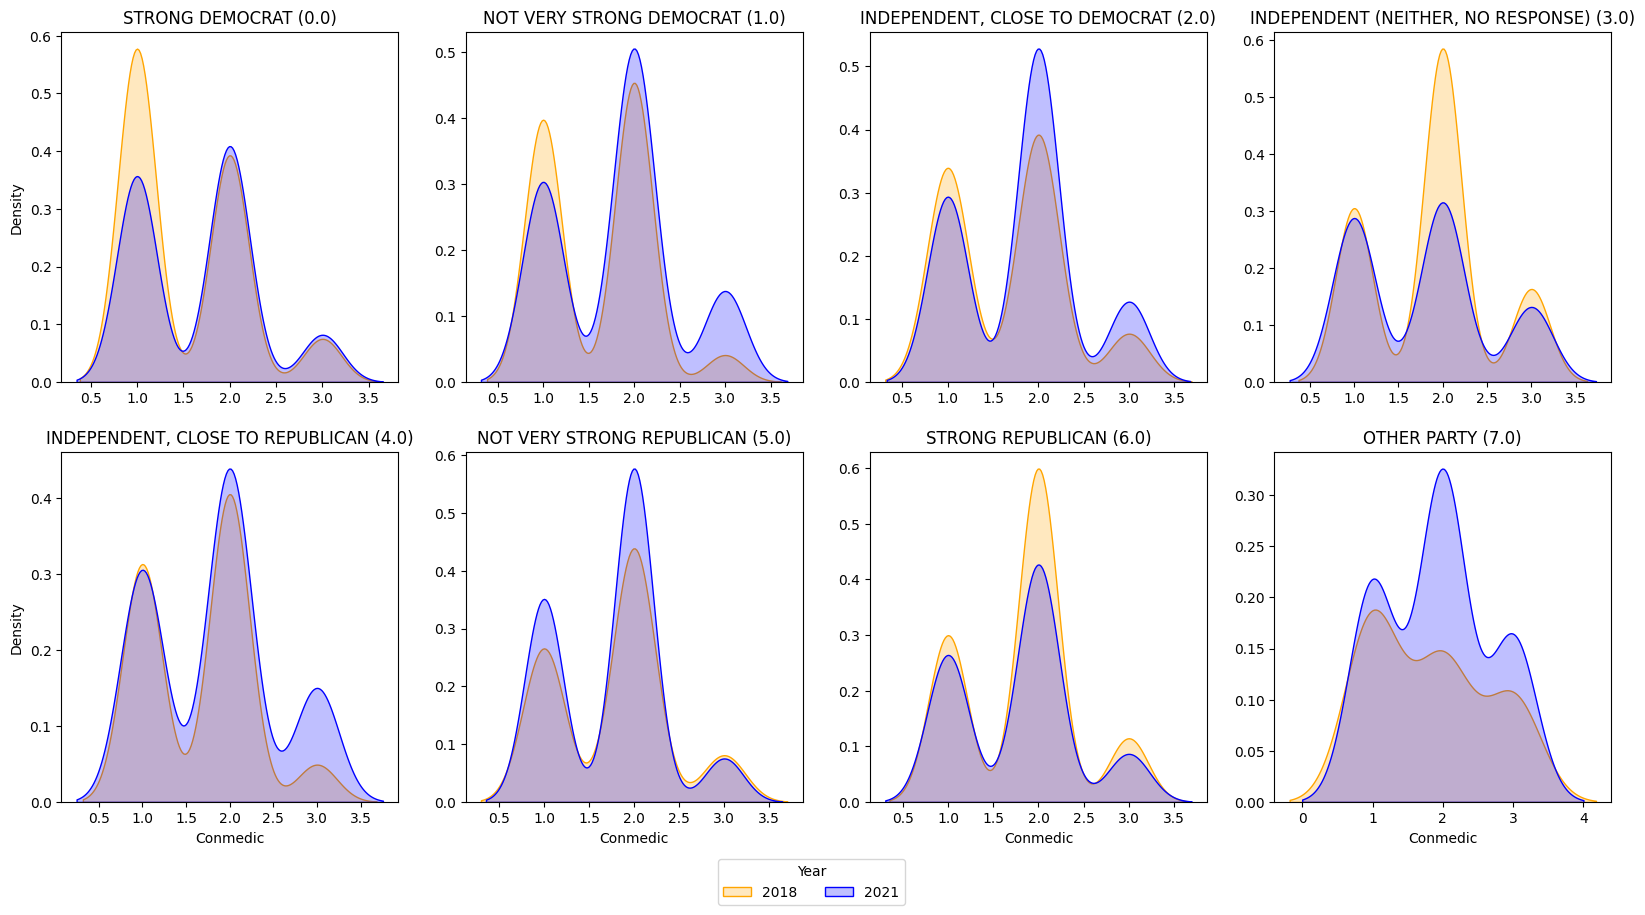

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

parties = sorted(df.partyid.dropna().unique())
fig, axs = plt.subplots(nrows = 2, ncols = 4, figsize = (20, 10))

for i, party in enumerate(parties):
    row = i//4
    col = i%4

    party_name = party_names[int(party)]

    plot = sns.kdeplot(data=df[df['partyid']==party], x='conmedic', hue='year', hue_order = [2018, 2021], palette=['blue', 'orange'], ax = axs[row][col], fill = True, legend=False)

    axs[row][col].set_xlabel("")
    axs[row][col].set_ylabel("")
    axs[row][col].set_title(f"{party_name} ({party})")

    if row==1:
        axs[row][col].set_xlabel("Conmedic")
    if col==0:
        axs[row][col].set_ylabel("Density")

plt.figlegend([2018, 2021], title='Year', loc='lower center', bbox_to_anchor=(0.5, 0), ncol=2)

Next, we will visualize kernel density of "conmedic" w.r.t "year" and "age": how has the age composition of the different "conmedic" rating groups changed pre and post pandemic?

Text(0, 0.5, 'Age')

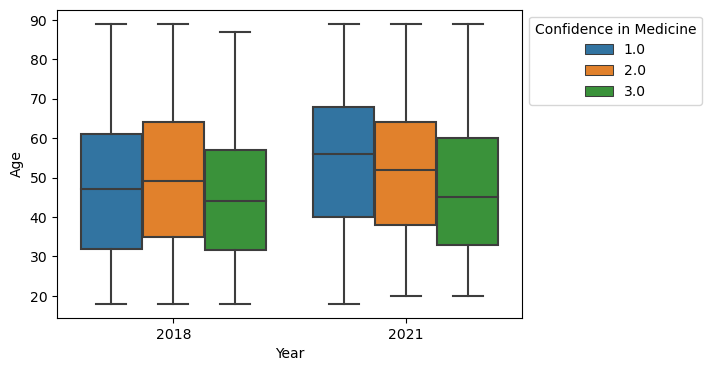

In [ ]:
fig = plt.figure(figsize=(6, 4))
sns.boxplot(data = df, x='year', y='age', hue='conmedic')
plt.legend(loc='upper left', title="Confidence in Medicine", bbox_to_anchor=(1, 1))
plt.xlabel("Year")
plt.ylabel("Age")

Looking at these boxplots, we can see that the interquartile range of each rating group began to exhibit a pattern in 2021. In 2021, the 1.0 (highest trust) rating group has the highest mean age, while the 3.0 rating group has the lowest mean age.

##### Further Exploration of Age and Trust Level

Because year and conmedic (the two pertinent variables) are discrete, scatterplot and jointplots that groups by age do not reveal much:

<Axes: xlabel='year', ylabel='conmedic'>

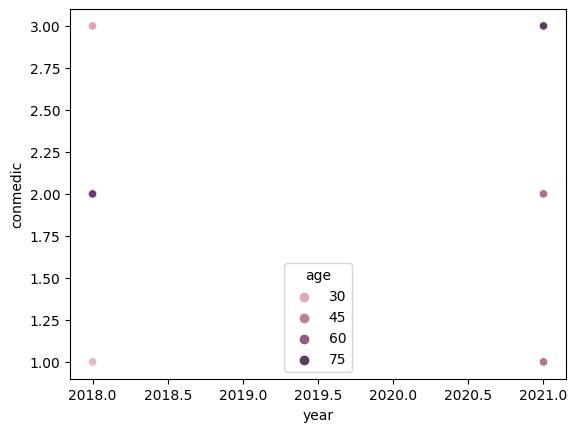

In [32]:
sns.scatterplot(data=df, x='year', y='conmedic', hue='age')

Instead, we can examine the distribution of age for our subjects in pre and post-pandemic surveys.

<AxesSubplot:xlabel='age', ylabel='Count'>

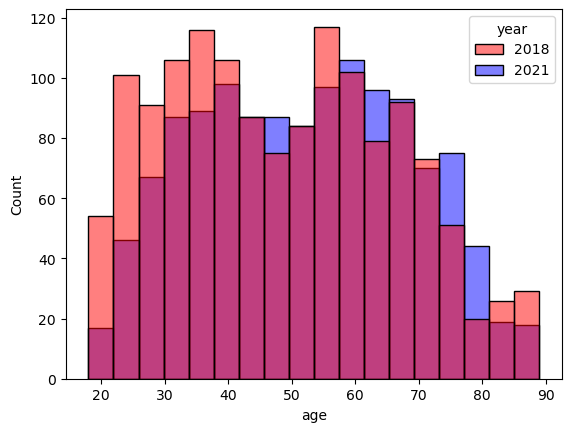

In [ ]:
sns.histplot(data = df, x='age', hue='year', palette=['red', 'blue'])

There seem to be more younger respondents in 2018, and more older ones in 2021.

The overall trend is for trust to slightly increase, which could be due to having fewer young respondents in the 2021 survey.

We will separate the respondents into age groups so we can investigate whether age groups' trust level changed over the years.

In [12]:
def calculate_age_group(original_value):
  if original_value < 24:
    return "18-24"
  if original_value < 35:
    return "25-34"
  if original_value < 45:
    return "35-44"
  if original_value < 55:
    return "45-54"
  if original_value < 65:
    return "55-64"

  return "65+"

df['age_group'] = df['age'].apply(calculate_age_group)

Plotting a boxplot of conmedic for each age group isn't very helpful; examining the description for conmedic grouped by age shows that every group (across both years) has the same IQR.

However, the mean and standard deviations are different, and those change across years.

<Axes: xlabel='conmedic', ylabel='age_group'>

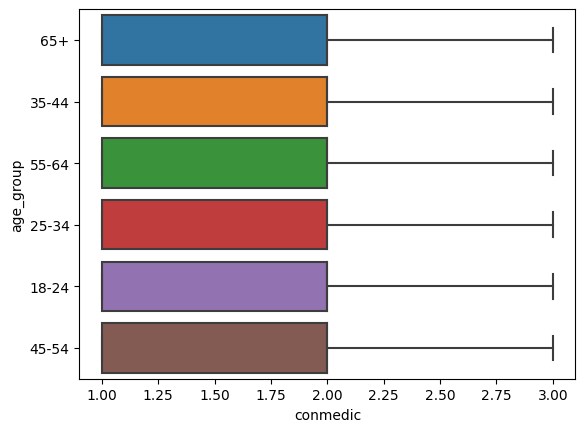

In [16]:
sns.boxplot(data=df, x='conmedic', y='age_group')

In [32]:
age_group_stats = df.loc[:,['conmedic', 'year', 'age_group']].groupby(['year', 'age_group']).describe()
print(age_group_stats)

               conmedic                                             
                  count      mean       std  min  25%  50%  75%  max
year age_group                                                      
2018 18-24        102.0  1.627451  0.643652  1.0  1.0  2.0  2.0  3.0
     25-34        287.0  1.829268  0.730538  1.0  1.0  2.0  2.0  3.0
     35-44        257.0  1.809339  0.660426  1.0  1.0  2.0  2.0  3.0
     45-54        199.0  1.839196  0.677392  1.0  1.0  2.0  2.0  3.0
     55-64        251.0  1.768924  0.659083  1.0  1.0  2.0  2.0  3.0
     65+          316.0  1.737342  0.599469  1.0  1.0  2.0  2.0  3.0
2021 18-24         37.0  1.756757  0.683350  1.0  1.0  2.0  2.0  3.0
     25-34        204.0  1.789216  0.687454  1.0  1.0  2.0  2.0  3.0
     35-44        226.0  1.765487  0.627414  1.0  1.0  2.0  2.0  3.0
     45-54        219.0  1.739726  0.643116  1.0  1.0  2.0  2.0  3.0
     55-64        258.0  1.682171  0.610982  1.0  1.0  2.0  2.0  3.0
     65+          460.0  1.639130 

To examine how the conmedic ratings change from 2018-2021 in each age group, it will be better to observe the kernel density plots of each age group.

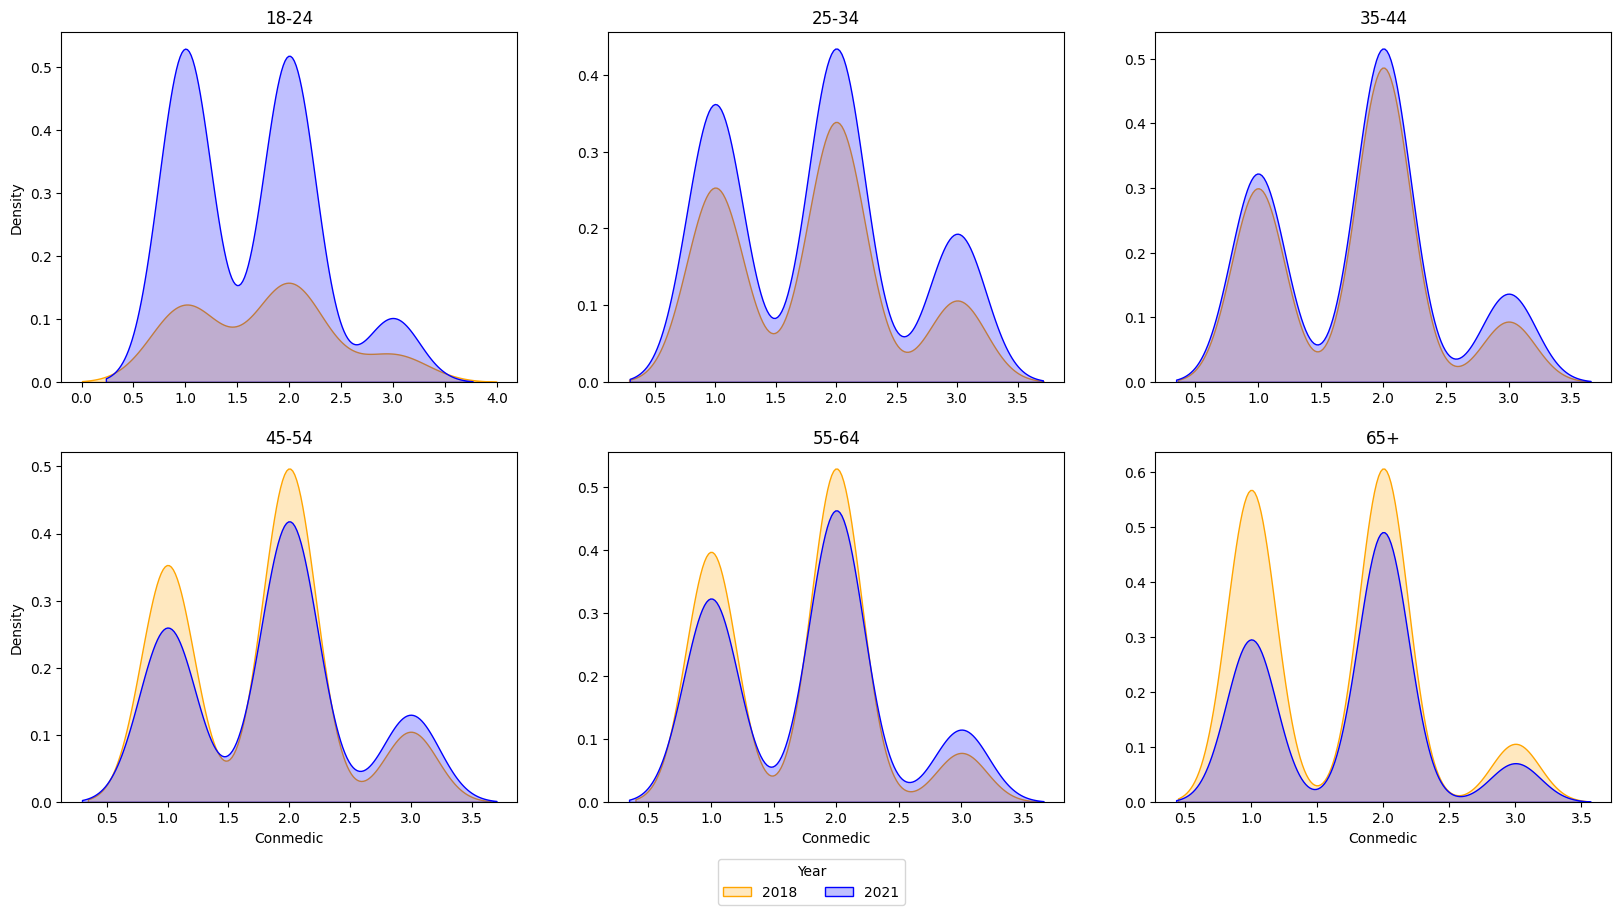

In [14]:

age_groups = sorted(df.age_group.dropna().unique())
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (20, 10))

for i, group in enumerate(age_groups):
    row = i//3
    col = i%3

    plot = sns.kdeplot(data=df[df['age_group']==group], x='conmedic', hue='year', hue_order = [2018, 2021], palette=['blue', 'orange'], ax = axs[row][col], fill = True, legend=False)

    axs[row][col].set_xlabel("")
    axs[row][col].set_ylabel("")
    axs[row][col].set_title(f"{group}")

    if row==1:
        axs[row][col].set_xlabel("Conmedic")
    if col==0:
        axs[row][col].set_ylabel("Density")

plt.figlegend([2018, 2021], title='Year', loc='lower center', bbox_to_anchor=(0.5, 0), ncol=2)

Additionally, we can plot how the mean and std of each age group has changed over time.

In [27]:
age_group_stats.shape

(12, 8)

In [71]:
age_group_stats

conmedic                                             
                  count      mean       std  min  25%  50%  75%  max
year age_group                                                      
2018 18-24        102.0  1.627451  0.643652  1.0  1.0  2.0  2.0  3.0
     25-34        287.0  1.829268  0.730538  1.0  1.0  2.0  2.0  3.0
     35-44        257.0  1.809339  0.660426  1.0  1.0  2.0  2.0  3.0
     45-54        199.0  1.839196  0.677392  1.0  1.0  2.0  2.0  3.0
     55-64        251.0  1.768924  0.659083  1.0  1.0  2.0  2.0  3.0
     65+          316.0  1.737342  0.599469  1.0  1.0  2.0  2.0  3.0
2021 18-24         37.0  1.756757  0.683350  1.0  1.0  2.0  2.0  3.0
     25-34        204.0  1.789216  0.687454  1.0  1.0  2.0  2.0  3.0
     35-44        226.0  1.765487  0.627414  1.0  1.0  2.0  2.0  3.0
     45-54        219.0  1.739726  0.643116  1.0  1.0  2.0  2.0  3.0
     55-64        258.0  1.682171  0.610982  1.0  1.0  2.0  2.0  3.0
     65+          460.0  1.639130  0.629859  1.0  1.0  2.0  2.0  3.0

In [74]:
mean_info = age_group_stats[('conmedic', 'mean')]
mean_info

year  age_group
2018  18-24        1.627451
      25-34        1.829268
      35-44        1.809339
      45-54        1.839196
      55-64        1.768924
      65+          1.737342
2021  18-24        1.756757
      25-34        1.789216
      35-44        1.765487
      45-54        1.739726
      55-64        1.682171
      65+          1.639130
Name: (conmedic, mean), dtype: float64

In [75]:
age_groups = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
means_2021 = [mean_info[2021][i] for i in range(len(mean_info[2021]))]
means_2018 = [mean_info[2018][i] for i in range(len(mean_info[2018]))]

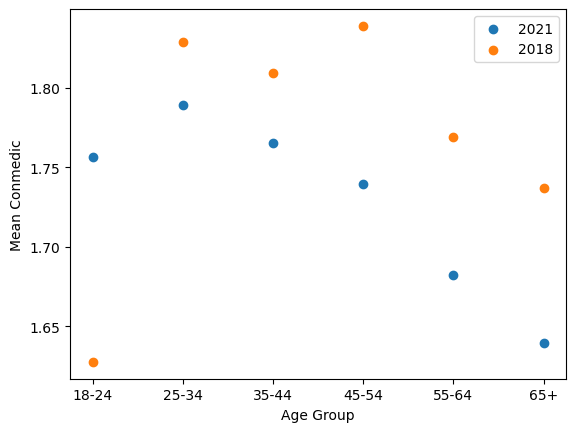

In [79]:
import matplotlib.pyplot as plt

plt.scatter(age_groups, means_2021, label = "2021")
plt.scatter(age_groups, means_2018, label = "2018")
plt.xlabel('Age Group')
plt.ylabel('Mean Conmedic')
plt.legend()
plt.show()